# Customer Segmentation Analysis Part 1

## Q. What is Customer Segmentation and why is it important from a marketing perspective?
Customer segmentation is the process of dividing your clientele into categories according to demographic, psychographic, and other factors. There are other advantages to client segmentation in addition to marketing objectives.

#### Import Libraries and Data


In [53]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Check encoding in the dataset because if you load the dataset without encoding an error will occur

In [54]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


## import the chardet library and use the detect method to find the type of encoding

In [55]:
import chardet

#### 'rb' means read in the file as binary

In [56]:
with open("Sales_data.csv", 'rb') as file: print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [57]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

# Data Exploration

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [59]:
data.shape

(541909, 8)

In [60]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

### Data Preprocessing

Remove Null Values

Remove Duplicate Values

In [61]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [62]:
data.shape

(406829, 8)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [64]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [66]:
filtered_data.shape

(4380, 2)

In [67]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [68]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights

Can we look at Top 10 country customer data

In [69]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [70]:
filtered_data.Country.value_counts()[:10]

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

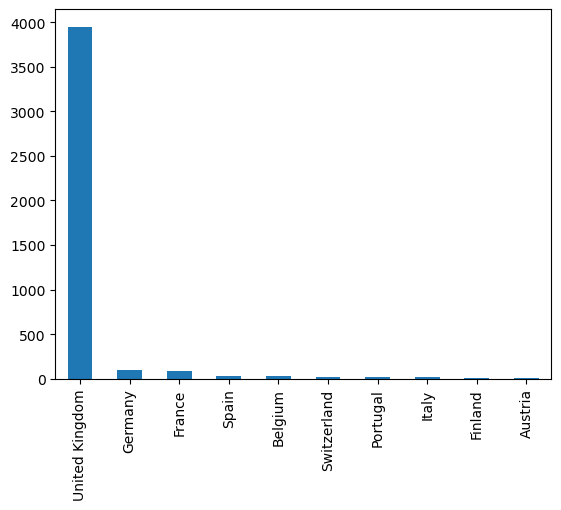

In [71]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

## Q. What do you observe?

United Kingdom is the nation with the most customers, and no other nation has more than 500 customers. We are running RFM analysis on the UK alone because the distribution is right-skewed and the dataset is biassed in that direction.

In [72]:
## Filter data by the top most country

In [73]:
uk_data=data[data.Country=='United Kingdom']

In [74]:
uk_data.shape

(361878, 8)

In [75]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


## Q. What do you observe? Which column needs special attention?
Because the quantity column contains negative numbers, more care must be used. The total price will be negative when computed using quantity and price, which will have an impact on how monetary value is performed. So, only take into account the observations where the quantity is still positive.

In [76]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [77]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [78]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [79]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

### Calculate Total Price (Quantity) * Unit Price

In [80]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

# Time frame of data

In [81]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


## Q. Comment on the above results.
  The minimum invoice date start time displayed here is different from what is displayed in the dataset. The date is the same, but the timestamp in the dataset for the minimum invoice date is different.

# Perform RFM Analysis

For Recency, Calculate the number of days between present date and date of last purchase for each customer.

For Frequency, Calculate the number of orders for each customer.

For Monetary, Calculate sum of purchase price for each customer

In [82]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2022, 10, 0o7)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [83]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [84]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [85]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results
Since every item on an invoice has the invoiceNo repeated, the method for determining the value counts of invoices is incorrect. For instance, there should be only one invoice, not five, if we purchase five goods on the same invoice.
Calculating the distinct InvoiceNo for each client is the actual method of discovering the InvoiceNo counts.

In [86]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [87]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [88]:
rfm


,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,4279,1,77183.60
12747.0,3956,103,4196.01
12748.0,3954,4596,33719.73
12749.0,3957,199,4090.88
12820.0,3957,59,942.34
...,...,...,...
18280.0,4231,10,180.60
18281.0,4134,7,80.82
18282.0,3961,12,178.05


In [89]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [90]:
rfm['recency'] = rfm['recency'].astype(int)

In [91]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [92]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,4279,1,77183
12747.0,3956,103,4196
12748.0,3954,4596,33719
12749.0,3957,199,4090
12820.0,3957,59,942


### Q. What is wrong with this table think ??
 The column names must be changed. Since we determined recency by utilising the least recent purchase made as of the current date and monetary as the total amount spent by customers during sales, the recency and monetary columns should be switched.

In [93]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

In [94]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,4279,1,77183
12747.0,3956,103,4196
12748.0,3954,4596,33719
12749.0,3957,199,4090
12820.0,3957,59,942


## Create Visuals

Histogram for Recency Data

Histogram for Frequency Data

Histogram for Monetary Data

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

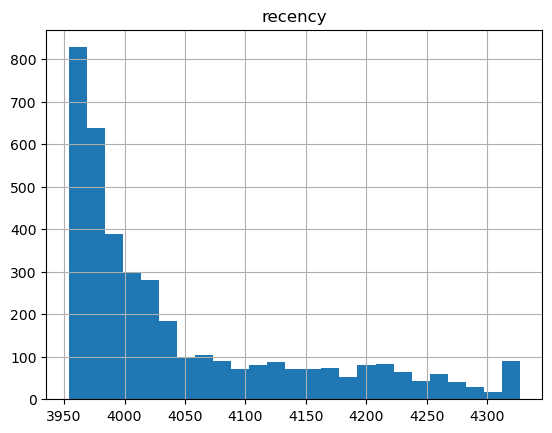

In [95]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

### Q. What does this above chart tell ?
The majority of customers are consistently making purchases at the stores and have a low recency rate. We have a larger discrepancy in the recency rate because we calculated the recency column using data from today and the dataset dates back to 2011. The majority of the clients who fit into the first bin of the distribution had only recently made a purchase.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

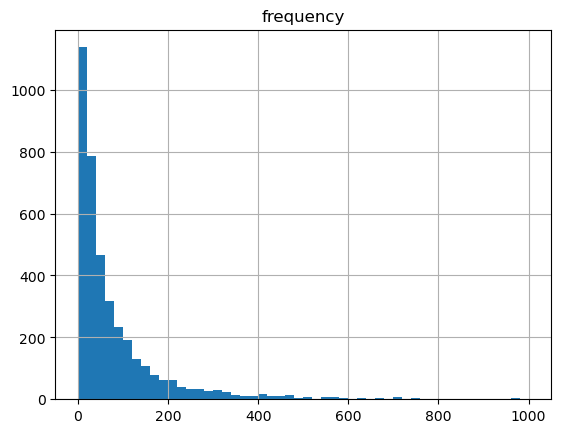

In [96]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50, range=[0, 1000])

### Q. What does this above chart tell ?
Over 75% of customers frequent the business frequently, and the frequency histogram is totally right-skewed.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

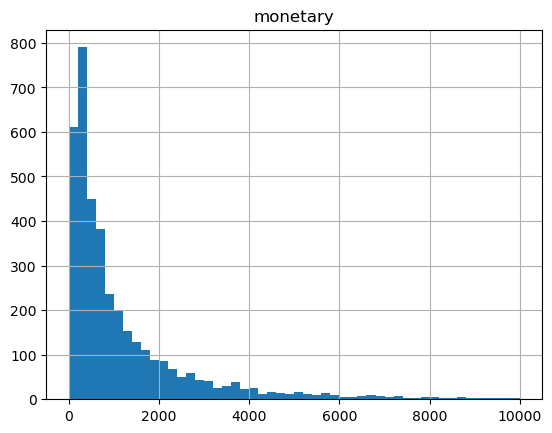

In [97]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50 , range=[0, 10000])

In [98]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,3970,488,5681
14110.0,3957,156,5683
13468.0,3955,302,5704
16553.0,4117,84,5719
13178.0,3980,265,5725
...,...,...,...
14733.0,3970,202,9585
13458.0,3961,382,9646
15078.0,3961,440,9743


##  Histogram for Monetary Data (UK)

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

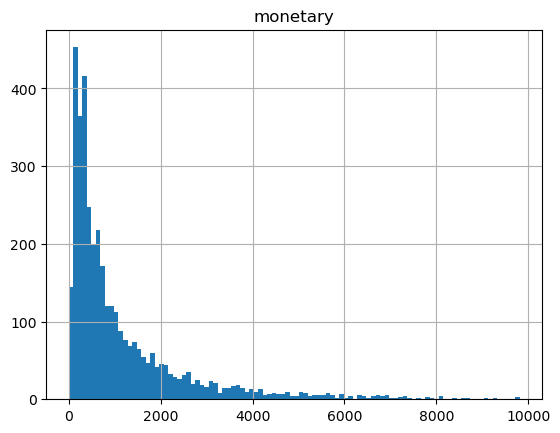

In [99]:
rfm.hist(column='monetary', bins=100)

 ### Q. What does this above chart tell ?
 The majority of consumer transactions involved purchases under 4,000, and very few customers made purchases beyond 4,000. In brief, client purchases are less expensive, and the distribution is right-skewed.

In [100]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score

In [101]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 3969.0, 0.4: 3987.0, 0.6: 4026.0, 0.8: 4136.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [102]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [103]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [104]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [105]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,3968,1,0,5,1,1,511
16738.0,4251,1,3,1,1,1,111
16454.0,3998,2,6,3,1,1,311
14792.0,4017,2,6,3,1,1,311
17956.0,4203,1,12,1,1,1,111


In [106]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,3968,1,0,5,1,1,511,new customers
16738.0,4251,1,3,1,1,1,111,at risk
16454.0,3998,2,6,3,1,1,311,needs attention
14792.0,4017,2,6,3,1,1,311,needs attention
17956.0,4203,1,12,1,1,1,111,at risk


In [107]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

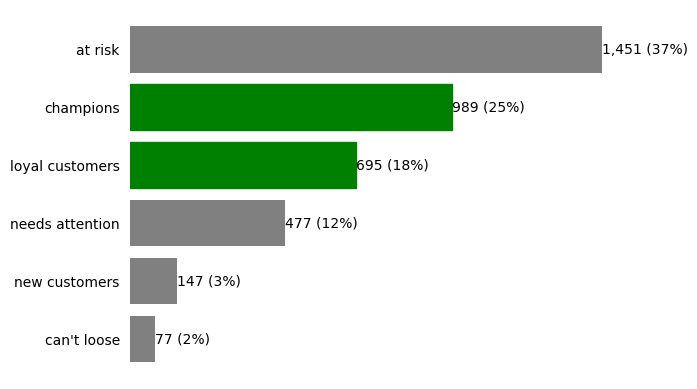

In [108]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Q. Comment on the above chart
It displays the number of customers and the proportion of customers who fit in each section based on rank and customer segmentation. Nearly 50% of our regular consumers are loyal and frequent visitors, and more than a quarter of our clients are at risk.

### Q. Who are the best customers?
The best clients are those who are very frequent visiting stores and have lesser recency rate with high monetary value.

In [109]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,3958,339,9818,5,5,5,555,champions
13199.0,3957,119,9817,5,5,5,555,champions
15078.0,3961,440,9743,5,5,5,555,champions
13458.0,3961,382,9646,5,5,5,555,champions
16523.0,3955,290,9418,5,5,5,555,champions


### Q. Which customers are likely to churn?
Customers are more likely to churn if their recency value is equal to one which means who have not been to the store in very recent time. In this case, The customers who have been labelled as 'At risk' and 'can't loose' have more probability to churn.

In [110]:
#Customers who's recency value is low

In [111]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,4229,159,7832,1,5,5,155,can't loose
17850.0,4326,297,5391,1,5,5,155,can't loose
15032.0,4210,52,4959,1,3,5,135,at risk
15808.0,4260,208,3734,1,5,5,155,can't loose
17230.0,4218,69,3638,1,4,5,145,at risk


### Q. Which customers we are going to loose?
The 'At risk' customer who have the lesser recency rate, frequency and monetary are the customers we might loose if we don't take action on them.

In [112]:
#Customers who's recency, frequency and monetary values are low 

In [113]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,4327,9,161,1,1,1,111,at risk
17643.0,4327,8,101,1,1,1,111,at risk
15350.0,4327,5,115,1,1,1,111,at risk
13747.0,4327,1,79,1,1,1,111,at risk
15070.0,4326,1,106,1,1,1,111,at risk


### Q. Who are the loyal customers?
The customers who visit the store often and have the frequency rate greater than 3 are Loyal customers. In this case, It is Champions and Loyal customers group.

In [114]:
#Customers with high frequency value

In [115]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,3958,339,9818,5,5,5,555,champions
13199.0,3957,119,9817,5,5,5,555,champions
15078.0,3961,440,9743,5,5,5,555,champions
13458.0,3961,382,9646,5,5,5,555,champions
14733.0,3970,202,9585,4,5,5,455,loyal customers


In [116]:
rfm_1=rfm

# Calculate RFM scores using 4 quartiles and answer all the questions again

Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6

In [117]:
rfm_1.drop('Segment',axis=1, inplace=True)
import warnings
warnings.filterwarnings("ignore")

C:\Users\Kiku\anaconda3\envs\DAB300\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
rfm_1.drop('RFM Score', axis=1, inplace=True)

In [119]:
rfm_1

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
13256.0,3968,1,0,5,1,1
16738.0,4251,1,3,1,1,1
16454.0,3998,2,6,3,1,1
14792.0,4017,2,6,3,1,1
17956.0,4203,1,12,1,1,1
...,...,...,...,...,...,...
14733.0,3970,202,9585,4,5,5
13458.0,3961,382,9646,5,5,5
15078.0,3961,440,9743,5,5,5


In [120]:
#Functions to create R, F and M segments
def RecencyScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FrequencyandMonetaryScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [121]:
#Split into four segments using quantiles
quantiles = rfm_1.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [122]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_1['R'] = rfm_1['recency'].apply(RecencyScore, args=('recency',quantiles,))
rfm_1['F'] = rfm_1['frequency'].apply(FrequencyandMonetaryScore, args=('frequency',quantiles,))
rfm_1['M'] = rfm_1['monetary'].apply(FrequencyandMonetaryScore, args=('monetary',quantiles,))
rfm_1.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
13256.0,3968,1,0,1,4,4
16738.0,4251,1,3,4,4,4
16454.0,3998,2,6,2,4,4
14792.0,4017,2,6,3,4,4
17956.0,4203,1,12,4,4,4


In [123]:
quantiles

{'recency': {0.25: 3972.0, 0.5: 4005.5, 0.75: 4101.0},
 'frequency': {0.25: 16.0, 0.5: 40.0, 0.75: 95.0},
 'monetary': {0.25: 293.0, 0.5: 628.0, 0.75: 1476.0},
 'R': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'F': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'M': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0}}

In [124]:
rfm_1['RFM1Score'] = rfm_1.R.map(str) + rfm_1.F.map(str) + rfm_1.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_1['RFMScore_total'] = rfm_1[['R', 'F', 'M']].sum(axis = 1)
rfm_1.head()

,recency,frequency,monetary,R,F,M,RFM1Score,RFMScore_total
CustomerID,,,,,,,,
13256.0,3968,1,0,1,4,4,144,9
16738.0,4251,1,3,4,4,4,444,12
16454.0,3998,2,6,2,4,4,244,10
14792.0,4017,2,6,3,4,4,344,11
17956.0,4203,1,12,4,4,4,444,12


In [125]:
rfm_1.head()

,recency,frequency,monetary,R,F,M,RFM1Score,RFMScore_total
CustomerID,,,,,,,,
13256.0,3968,1,0,1,4,4,144,9
16738.0,4251,1,3,4,4,4,444,12
16454.0,3998,2,6,2,4,4,244,10
14792.0,4017,2,6,3,4,4,344,11
17956.0,4203,1,12,4,4,4,444,12


In [126]:
import warnings
warnings.filterwarnings("ignore")
#Assign Loyalty Level to each customer
New_segment = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4']
Score_cuts = pd.qcut(rfm_1.RFMScore_total	, q = 4, labels = New_segment)
rfm_1['RFM_new_segment'] = Score_cuts.values
rfm_1.reset_index().head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM1Score,RFMScore_total,RFM_new_segment
0,13256.0,3968,1,0,1,4,4,144,9,Rank 3
1,16738.0,4251,1,3,4,4,4,444,12,Rank 4
2,16454.0,3998,2,6,2,4,4,244,10,Rank 3
3,14792.0,4017,2,6,3,4,4,344,11,Rank 4
4,17956.0,4203,1,12,4,4,4,444,12,Rank 4


### Q. Who are the best customers?
Rank 1 customers are best customers

### Q. Which customers are likely to churn?
Rank 3 customers are more likely to churn because of the lower recency and frequency rate.

### Q. Which customers we are going to loose?
We are going to loose Rank 4 customers if proper care is not given

### Q. Who are the loyal customers?
Rank 1 are the loyal customers who have higher frequeny and monetary rate and lower recency rate

## Customer Segmentation Analysis Part 2

In [127]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [128]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [129]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,3968,1,0
16738.0,4251,1,3
16454.0,3998,2,6
14792.0,4017,2,6
17956.0,4203,1,12


<AxesSubplot:xlabel='recency'>

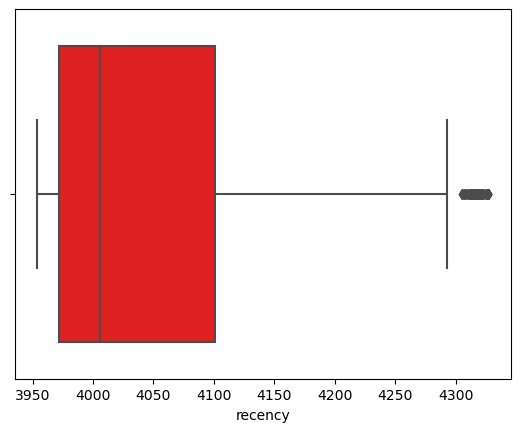

In [130]:
sns.boxplot(x="recency", data=rfm, color="red")

<AxesSubplot:xlabel='frequency'>

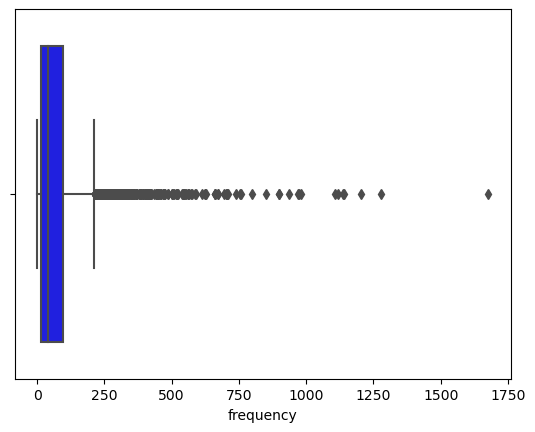

In [131]:
sns.boxplot(x="frequency", data=rfm, color="blue")

<AxesSubplot:xlabel='monetary'>

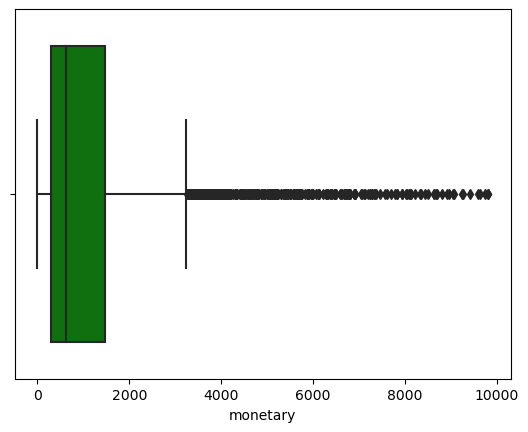

In [132]:
sns.boxplot(x="monetary", data=rfm, color="green")

In [133]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [134]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

Ans:
The purpose of the above code is to remove outliers. The above code keeps values whose z score is less than 3. The value greater than 3 are considered as outliers because in a normal distribution the values that exist beyond 3 standard deviations are considered as outliers. We are saving the records of Z score less than 3 to rfm_clean.

In [135]:
rfm_clean

,recency,frequency,monetary
CustomerID,,,
13256.0,3968,1,0
16738.0,4251,1,3
16454.0,3998,2,6
14792.0,4017,2,6
17956.0,4203,1,12
...,...,...,...
18225.0,3957,271,5509
15805.0,3977,301,5528
16767.0,3984,222,5580


In [136]:
rfm.shape

(3836, 3)

In [137]:
rfm_clean.shape

(3683, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:xlabel='recency'>

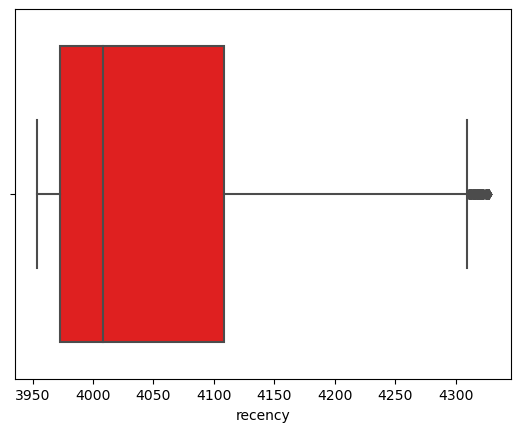

In [138]:
sns.boxplot(x="recency", data=rfm_clean, color="red")

<AxesSubplot:xlabel='frequency'>

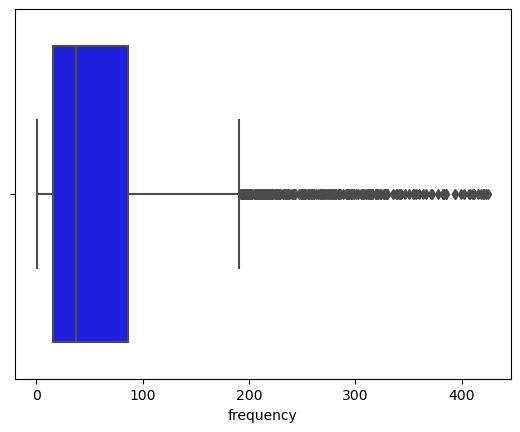

In [139]:
sns.boxplot(x="frequency", data=rfm_clean, color="blue")

<AxesSubplot:xlabel='monetary'>

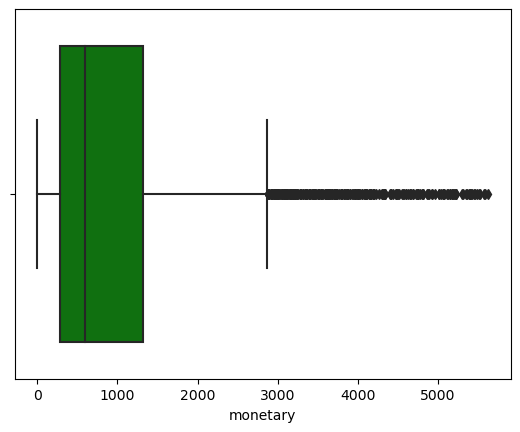

In [140]:
sns.boxplot(x="monetary", data=rfm_clean, color="green")

<AxesSubplot:>

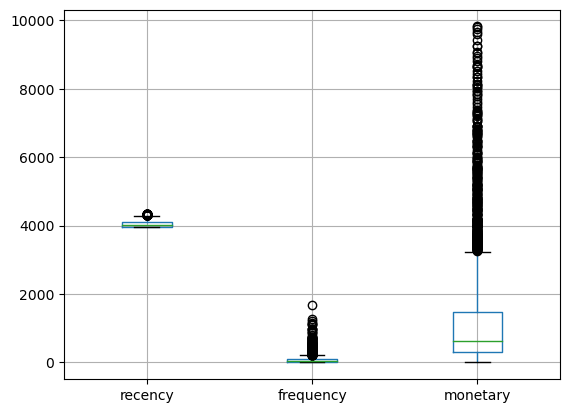

In [141]:

rfm.boxplot()


<AxesSubplot:>

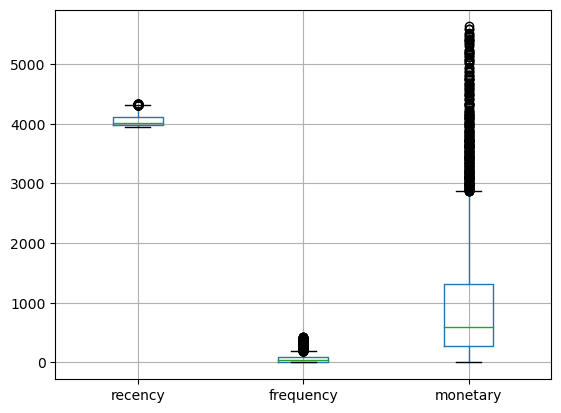

In [142]:
rfm_clean.boxplot()

Ans:

In the boxplot created with the clean data, It can be clearly seen that the number of outliers have reduced substantially. 
No major difference can be seen in the number of outliers in the box plot for recency between previous and the new data. although some difference can be observed. 

The boxplot displays a major difference in the number of outliers between previous and new data for frequency and monetary



### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

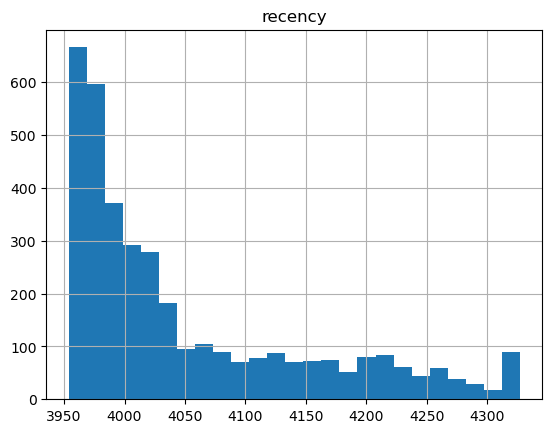

In [143]:
rfm_clean.hist(column='recency', bins=25)

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

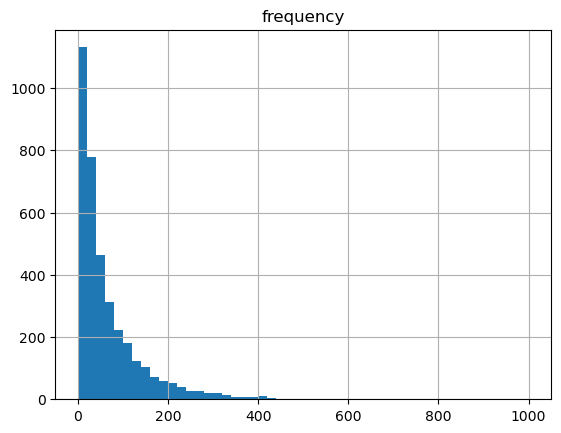

In [144]:
rfm_clean.hist(column='frequency', bins=50, range=[0, 1000])

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

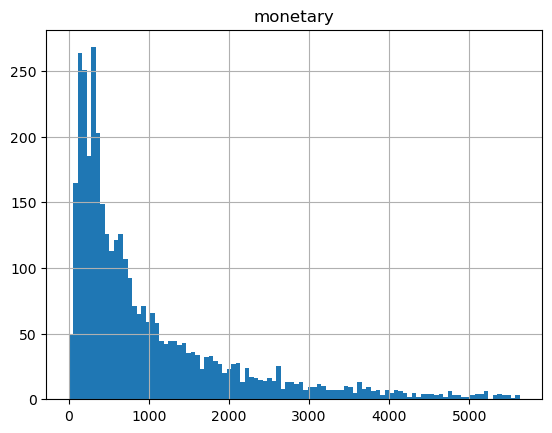

In [145]:
rfm_clean.hist(column='monetary', bins=100)

Ans:
    
Recency: The histogram for recency with cleaned data is right skewed like the previous histogram. However, there is a minor increase in the recency with the clean data. Most of the customers still have less recency rate, but the maximum recency rate has decreased from 800 to 600.  

Frequency: The histogram for frequency with cleaned data is right skewed like its previous histogram. The cleaned data has more than 90% of its customers visiting frequently which is a major improvement from its previous data that had 75% customers frequenting the business.

Monetary:  The histogram for monetary with cleaned data is right skewed like its previous histogram. The cleaned data suggests that all of its customers make purchases below 6000 and more than 80% of the customer make purchases below 3000. The customer purchases show a decline from the previous histogram.


## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [146]:
X = rfm

In [147]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,3968,1,0
16738.0,4251,1,3
16454.0,3998,2,6
14792.0,4017,2,6
17956.0,4203,1,12


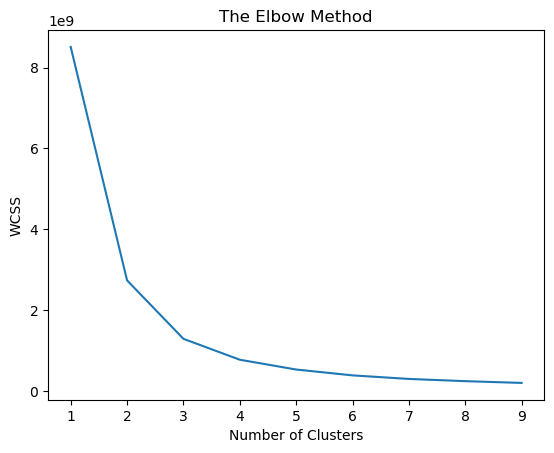

In [148]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [150]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [151]:
rfm['Cluster_ID'] = y_kmeans

In [152]:
rfm

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,3968,1,0,0
16738.0,4251,1,3,0
16454.0,3998,2,6,0
14792.0,4017,2,6,0
17956.0,4203,1,12,0
...,...,...,...,...
14733.0,3970,202,9585,2
13458.0,3961,382,9646,2
15078.0,3961,440,9743,2


In [153]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,3968,1,0,0
16738.0,4251,1,3,0
16454.0,3998,2,6,0
14792.0,4017,2,6,0
17956.0,4203,1,12,0


## Plot the graphs

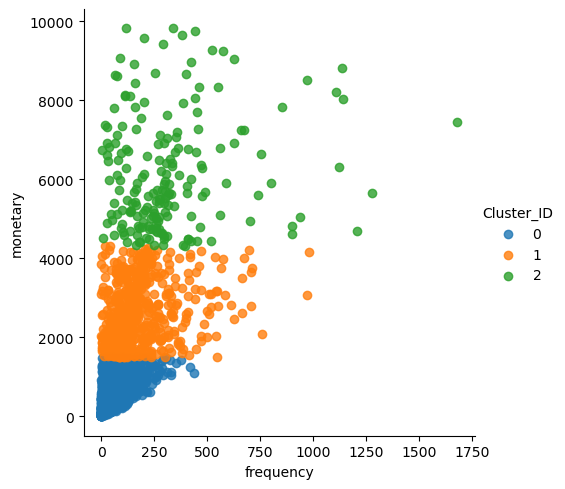

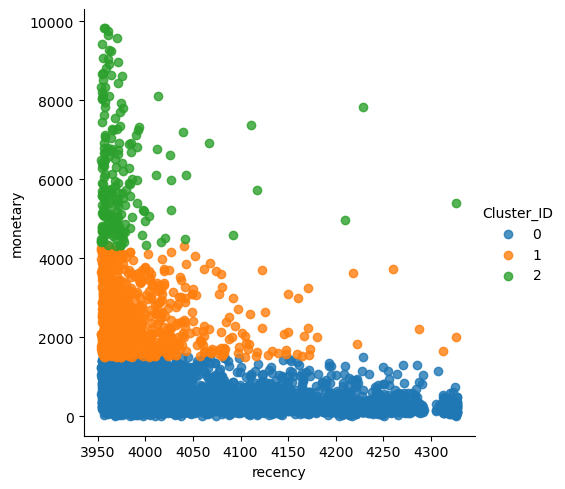

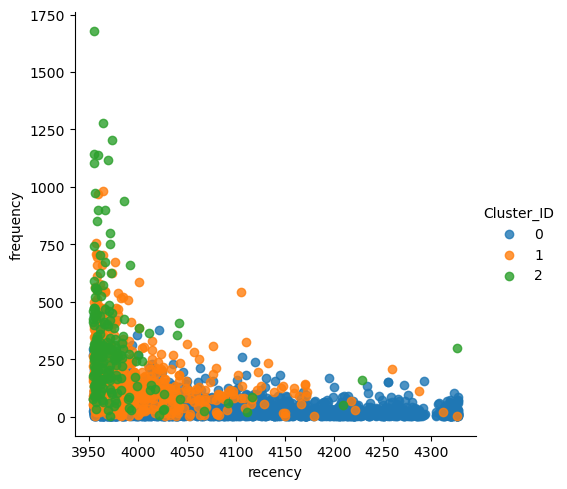

In [154]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

Ans:

- Frequency vs Monetary:

In this plot we can clearly see that the monetary feature offers significant clustering of data. A prominent difference can be seen between the grouping of the data. We can see a positive correlation between the increase in the frequency and monetary value. Customer who visits more frequently tends to spend more.  Highest monetary purchases are in cluster 1 and so is the frequency. Lowest monetary and frequency is in cluster 0.

- Recency vs Monetary:

In this plot we can clearly see that the monetary feature offers significant clustering of data. A prominent difference can be seen between the grouping of the data. The purchases with highest monetary value have mostly been made by the customer with high recency value which happens to be cluster 1. Cluster 0 has majority of customers with low recency and low monetary value. 

- Frequency vs Recency:

There is no clear grouping in the graph for frequency vs recency. Cluster 1 has majority of customers who are recent and frequent, however this cluster itself has least number of customers. Majority number of customers can be seen in cluster 2, they have the greatest number of recent customers.  Cluster 0 has least number of frequent customers. 


## Q. Perform Cluster Analysis with k=4

In [155]:
kmeans = KMeans(n_clusters = 4)
y_4kmeans = kmeans.fit_predict(X)

In [156]:
y_4kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [157]:
rfm['Cluster_ID_4'] = y_4kmeans

In [158]:
rfm.head()

,recency,frequency,monetary,Cluster_ID,Cluster_ID_4
CustomerID,,,,,
13256.0,3968,1,0,0,0
16738.0,4251,1,3,0,0
16454.0,3998,2,6,0,0
14792.0,4017,2,6,0,0
17956.0,4203,1,12,0,0


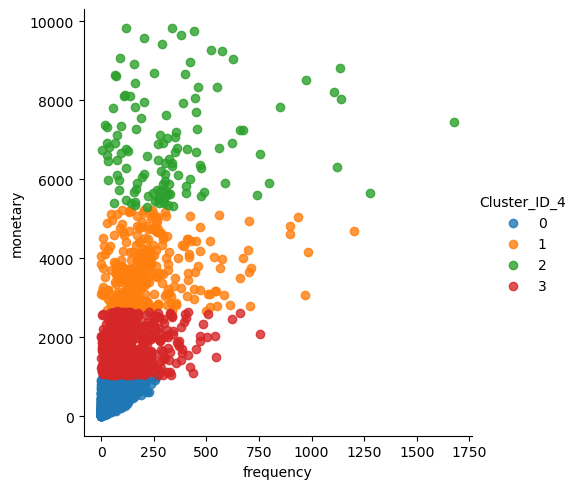

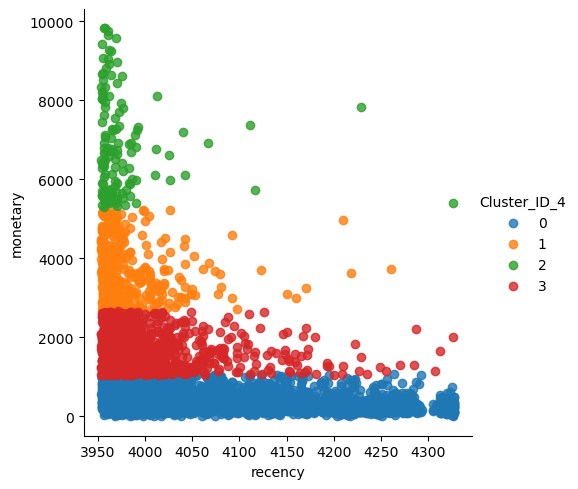

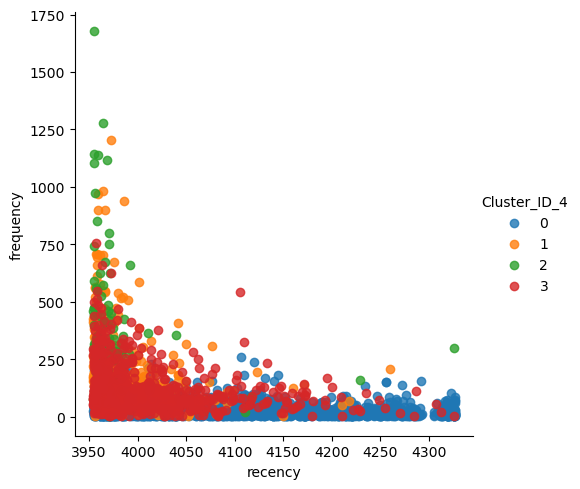

In [159]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID_4', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID_4', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID_4', 
                   fit_reg=False, legend=True, legend_out=True)

## Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [160]:
Y = rfm_clean

In [161]:
Y.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,3968,1,0
16738.0,4251,1,3
16454.0,3998,2,6
14792.0,4017,2,6
17956.0,4203,1,12


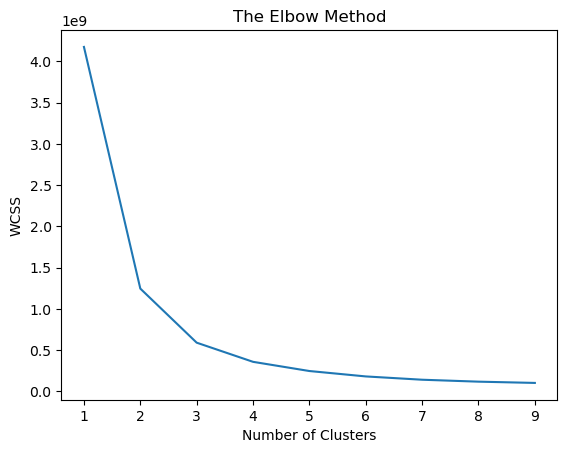

In [162]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    k_cleanmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    k_cleanmeans.fit(Y)
    wcss.append(k_cleanmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [163]:
k_cleanmeans = KMeans(n_clusters = 3)
y_cleankmeans = k_cleanmeans.fit_predict(Y)

In [164]:
y_cleankmeans

array([0, 0, 0, ..., 2, 2, 2])

In [165]:
rfm_clean['Cluster_ID'] = y_cleankmeans

In [166]:
rfm_clean

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,3968,1,0,0
16738.0,4251,1,3,0
16454.0,3998,2,6,0
14792.0,4017,2,6,0
17956.0,4203,1,12,0
...,...,...,...,...
18225.0,3957,271,5509,2
15805.0,3977,301,5528,2
16767.0,3984,222,5580,2


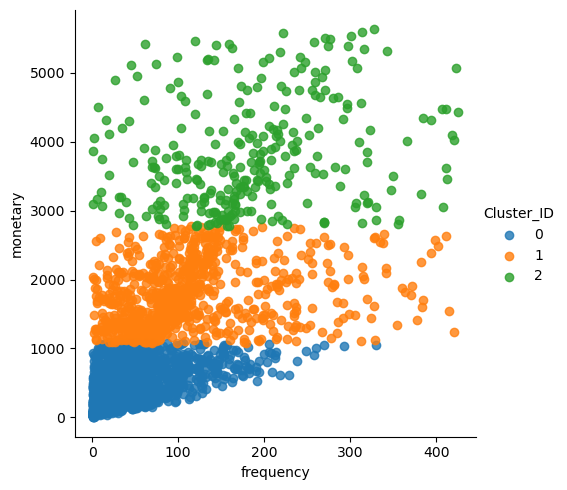

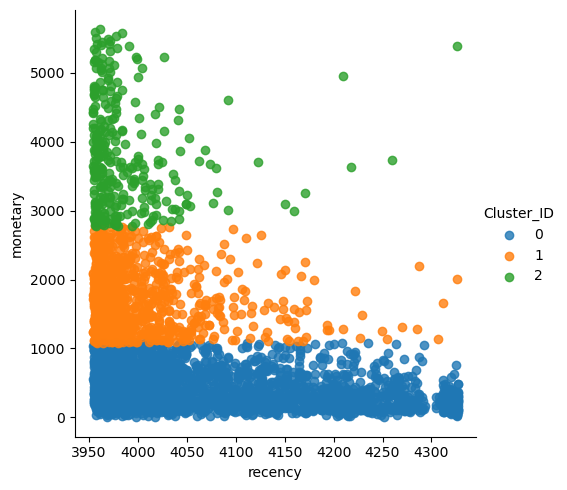

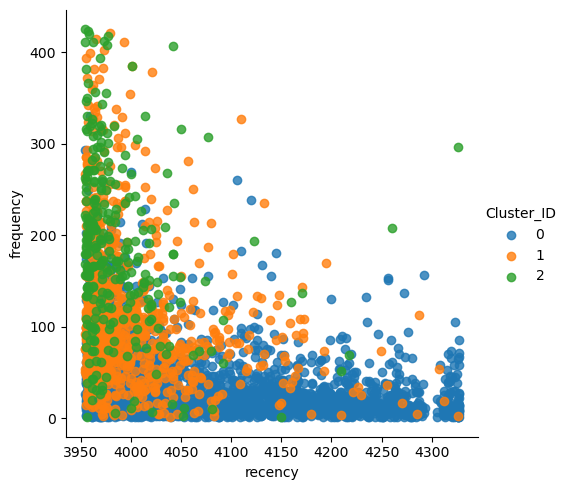

In [167]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=Y, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=Y, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=Y, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Ans:

We have chosen K value as 3 to perform cluster analysis on “rfm_clean” data. The K value was chosen as 3 to reduce the complexity and avoid overfitting of the model. The analysis yields almost a similar report as that of the “rfm” dataset.

 - Frequency vs Monetary:
 
1.	Most of the monetary value is yielded from cluster 0.
2.	Cluster 2 has most frequent customers
3.	Cluster 1 has least frequent customers making lease purchases. 

- Recency vs Monetary:

1.	Cluster 0 and 2 have many numbers of recent customers.
2.	Cluster 1 has majority of non recent customers and customers who spend least amount of money.

- Frequency vs Recency:

1.	Cluster 2 has most frequent and most recent customers.
2.	Cluster 1 has least recent customers.
3.	Cluster 0 has most number of customers, however majority of these customers bring high monetary value. 


    

## Calculate mean for every cluster

In [168]:
for i in range(4): rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,4072.843787,35.651344,433.631866
1,4002.783293,110.561743,1734.914044
2,3987.534483,183.531034,3817.748276
